In [1]:
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
import pandas as pd

# 1 Data

In [90]:
personas = pd.read_csv('..\\..\\Datos\\experiments\\personas_cotizacion7.csv',encoding = "ISO-8859-1")
personas.columns


Index(['Unnamed: 0', 'actividad', 'compra', 'is_apellido1', 'is_apellido2',
       'is_celular', 'is_descuento', 'is_direccion', 'is_fnac', 'is_nombre',
       'is_nombrecompleto', 'is_nrofam', 'is_presencial', 'is_profesion',
       'is_recontacto', 'is_remoto', 'is_telefono', 'loc_comuna',
       'loc_provincia', 'loc_region', 'max_rango_edad', 'mean_cot_bod',
       'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'medio_inicial',
       'negocio', 'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta',
       'nro_cot_estu', 'nro_proyectos', 'profesion', 'rut', 'sexo',
       'tipo_cliente', 'valid_rut', 'Altos del Valle', 'Edificio Urban 1470',
       'San Andres Del Valle', 'Edificio Mil610', 'Edificio Junge'],
      dtype='object')

In [91]:
# personas.info()

In [92]:
personas['loc_comuna'] = personas['loc_comuna'].astype('category')
personas['loc_provincia'] = personas['loc_provincia'].astype('category')
personas['loc_region'] = personas['loc_region'].astype('category')
personas['tipo_cliente'] = personas['tipo_cliente'].astype('category')
personas['sexo'] = personas['sexo'].astype('category')
personas.profesion.fillna('sin informacion', inplace=True)
personas['profesion'] = personas['profesion'].astype('category')
personas['medio_inicial'] = personas['medio_inicial'].astype('category')

In [93]:
# personas.info()

In [94]:
personas_compraron = personas[personas.compra == True]
p_compra = personas.compra

predictores = ['actividad', 'is_descuento', 'is_direccion', 'is_fnac','is_nrofam', 'is_presencial', 'is_profesion',
       'is_recontacto', 'is_remoto', 'is_telefono', 'loc_comuna',
       'loc_provincia', 'loc_region', 'max_rango_edad', 'mean_cot_bod',
       'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'medio_inicial',
       'negocio', 'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta',
       'nro_cot_estu', 'nro_proyectos', 'profesion', 'sexo',
       'tipo_cliente', 'Altos del Valle', 'Edificio Urban 1470',
       'San Andres Del Valle', 'Edificio Mil610', 'Edificio Junge']

personas_compraron = personas_compraron[predictores]

In [95]:
print(personas.shape)
# print(personas.columns)
drop_columns = [personas.columns[0], 'rut', 'negocio', 'compra', 'max_rango_edad']

p_negocio = personas.negocio
personas = personas.drop(drop_columns, axis=1)

print(personas.shape)
print(p_negocio.shape)

personas = pd.get_dummies(personas)

print(personas.shape)
# personas.describe()

(6183, 42)
(6183, 37)
(6183,)
(6183, 198)


In [96]:
# Check the data set
print("Tamaño Total: ",personas.shape)
print("Personas que hicieron Negocio: ",p_negocio[p_negocio == True].shape)
print("Personas que no Hicieorn Negocio: ",p_negocio[p_negocio == False].shape)

Tamaño Total:  (6183, 198)
Personas que hicieron Negocio:  (1100,)
Personas que no Hicieorn Negocio:  (5083,)


In [98]:
print("Tamaño Total: ",personas_compraron.shape)
print("Personas que compraron: ",p_compra[p_compra == True].shape)
print("Personas que no compraron: ",p_compra[p_compra == False].shape)

Tamaño Total:  (288, 33)
Personas que compraron:  (288,)
Personas que no compraron:  (5895,)


# 2 Unsupervised Learning

In [99]:
personas_compraron = pd.get_dummies(personas_compraron)

## 2.1 Dim Reduction

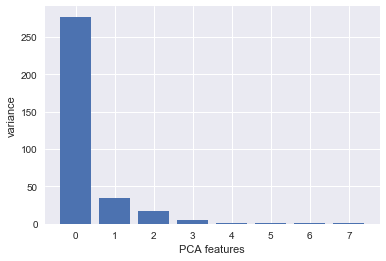

In [100]:
from sklearn.decomposition import PCA
#check variance
pca = PCA(n_components = 8)
pca.fit(personas_compraron)

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA features')
plt.show()

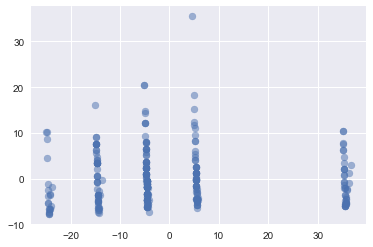

In [101]:
pca = PCA(n_components = 2)
pca.fit(personas_compraron)
transformed = pca.transform(personas_compraron)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,alpha=0.5)
plt.show()

## 2.2 KMeans

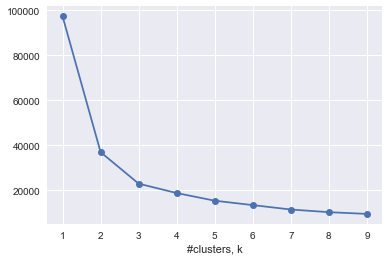

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []
scaler = StandardScaler()

# for k in ks:
#     model = KMeans(n_clusters=k)
#     pipeline = make_pipeline(scaler,model)
#     pipeline.fit(personas)
#     inertias.append(pipeline.named_steps['kmeans'].inertia_)
 
for k in ks:
    model = KMeans(n_clusters=k)
#     pipeline = make_pipeline(scaler,model)
    model.fit(personas_compraron)
    inertias.append(model.inertia_)
    
plt.plot(ks,inertias, '-o')
plt.xlabel('#clusters, k')
plt.xticks(ks)
plt.show()

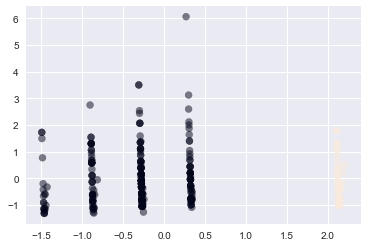

In [103]:
#Clustering

scaler = StandardScaler()

km = KMeans(n_clusters=2, max_iter=300, random_state=None, n_jobs=6)
km.fit(personas_compraron)

# pipeline = make_pipeline(scaler,km)
# pipeline.fit(personas)

# clusters = km.fit_predict(personas)
# personas['cluster'] = pipeline.fit_predict(personas)
personas_compraron['km_cluster'] = km.fit_predict(personas_compraron)

# Principal Component Analysis
pca = PCA(n_components=2, whiten=True)
pca.fit(personas_compraron)

xs = pca.fit_transform(personas_compraron)[:, 0]
ys = pca.fit_transform(personas_compraron)[:, 1]

plt.scatter(xs, ys, c=personas_compraron['km_cluster'],alpha=0.5)
plt.show()


In [104]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'personas': personas_compraron['km_cluster'], 'compraron': p_compra})

# Create crosstab: ct
ct = pd.crosstab(df['personas'],df['compraron'])

# Display ct
print(ct)

compraron  True
personas       
0.0         247
1.0          41


In [114]:
g = personas_compraron.groupby('km_cluster').mean().T
g['dif'] =  np.abs(g[0] - g[1])
asc = g.sort_values(by='dif', ascending=False)
asc

km_cluster,0,1,dif
max_rango_edad,41.295547,0.000000,41.295547
San Andres Del Valle,5.283401,3.195122,2.088279
nro_cot_bod,0.437247,2.243902,1.806655
Edificio Junge,0.251012,1.926829,1.675817
nro_cot_esta,0.748988,2.048780,1.299793
nro_cot_depto,5.923077,5.439024,0.484053
mean_cot_bod,0.090047,0.432528,0.342481
mean_cot_esta,0.139096,0.422598,0.283502
actividad_Profesional,0.744939,0.463415,0.281525
is_nrofam,0.769231,0.560976,0.208255


In [115]:
asc.to_excel("compradores_grupos.xlsx")

## 2.2 TSNE

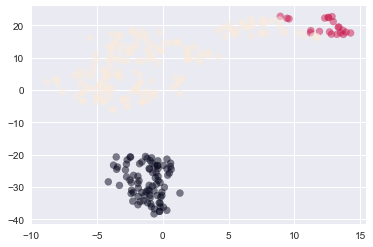

In [74]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, max_iter=300, random_state=None, n_jobs= 6)
personas_compraron['tsne_cluster'] = km.fit_predict(personas_compraron)

from sklearn.manifold import TSNE

model = TSNE(learning_rate = 100)
transformed = model.fit_transform(personas_compraron)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=personas_compraron['tsne_cluster'],alpha=0.5)
plt.show()

In [17]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'personas': personas['tsne_cluster'], 'negocio': p_negocio})

# Create crosstab: ct
ct = pd.crosstab(df['personas'],df['negocio'])

# Display ct
print(ct)

negocio   False  True 
personas              
0           352    129
1           207    390
2          4524    582


In [18]:
personas.groupby('tsne_cluster').mean()

,is_apellido1,is_appelido2,is_celular,is_direccion,is_fnac,is_nombre,is_nombrecompleto,is_nrofam,is_profesion,is_recontacto,...,profesion_Técnico en Logística,profesion_Vendedor,profesion_Visitador Médico,profesion_sin informacion,sexo_Femenino,sexo_Masculino,sexo_Sin Información,tipo_cliente_Jurídico,tipo_cliente_Natural,km_cluster
tsne_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.997921,0.829522,0.991684,0.276507,0.185031,1.000000,1.000000,0.380457,0.430353,0.182952,...,0.000000,0.002079,0.000000,0.569647,0.401247,0.586279,0.012474,0.002079,0.997921,2
1,1.000000,0.951424,1.000000,0.495812,0.422111,1.000000,1.000000,0.552764,0.564489,0.668342,...,0.001675,0.001675,0.000000,0.435511,0.324958,0.670017,0.005025,0.000000,1.000000,1
2,0.994908,0.828829,0.992362,0.174892,0.103799,0.999608,0.999608,0.292205,0.334313,0.150803,...,0.000000,0.000588,0.000392,0.665687,0.407168,0.569134,0.023698,0.005092,0.994908,0
